# 逻辑回归

1、逻辑回归与线性回归的联系与区别   
  
2、逻辑回归的原理  
  
3、逻辑回归损失函数推导及优化  
  
4、正则化与模型评估指标  
  
5、逻辑回归的优缺点  
  
6、样本不均衡问题解决办法 
  
7、sklearn参数  
  
8、代码实现

## 1、逻辑回归与线性回归的联系与区别 

线性回归解决的是连续变量问题，那么在分类任务中可以用线性回归吗？例如判断是良性肿瘤还是恶性肿瘤，判断是垃圾邮件还是正常邮件，等等……

答案是也可以，但是效果不好，见下图：

<img src = "https://img-blog.csdnimg.cn/20190830143654227.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2RwZW5nd2FuZw==,size_16,color_FFFFFF,t_70">

图显示了是否购买玩具和年龄之间的关系，可以用线性回归拟合成一条直线，将购买标注为1，不购买标注为0，拟合后取当0.5值为阈值来划分类别。


$$\hat y = \begin{cases}
1,& f(x)>0.5\\
0,& f(x)<0.5
\end{cases}$$

可以看到，在途中，年龄的区分点约为19岁。

但当数据点不平衡时，很容易影响到阈值，见以下图：

<img src = "https://img-blog.csdnimg.cn/20190830143716479.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2RwZW5nd2FuZw==,size_16,color_FFFFFF,t_70">

可以看到，0值样本的年龄段往高年龄端偏移后，真实的阈值依然是19岁左右，但拟合出来的曲线的阈值往后边偏移了。可以想想，负样本越多，年龄大的人越多，偏移越严重。

可是这符合实际情况吗？实际情况是60岁的老人和80岁的老人都不会购买玩具，增加几位80岁的老人，并不会影响20岁以下人群购买玩具的概率。但因为拟合曲线原本的值域为$(-\infty \  \infty)$而转换后的值域为[0,1]，阈值对变量偏移很敏感。

## 2、逻辑回归的原理 

因此理想的替代函数应当预测分类为0或1的概率，当为1的概率大于0.5时，判断为1，当为1的概率小于0.5时，判断为0。因概率的值域为$[0,1]$，这样的设定比线性回归合理很多。

常用的替代函数为Sigmoid函数，即：

$$
h(z) = \frac{1}{1+e^{-z}}
$$

其中，$z = \theta^T x$

我们可以看到，当z大于0时，函数大于0.5；当函数等于0时，函数等于0.5；函数小于0时，函数小于0.5。如果用函数表示目标分到某一类的概率，我们可以采用以下“单位阶跃函数”来判断数据的类别：

$$h(z) = \left\{
\begin{aligned}
0，& & z<0 \\
0.5， & & z=0 \\
1， & & z>0
\end{aligned}
\right.$$

若Z大于0，则判断为正例；若小于0，判断为反例；若等于0，可任意判别。由于Sigmoid函数单调且可导，函数在（0，1）之间程Z字型，可以很好的模拟二分类情况，因此很适合我们要解决的问题。  
  
接下来我们来推导逻辑回归函数的优化

## 3、逻辑回归损失函数推导及优化

$$
P(y=1|x;\theta) = h_\theta (x) \\
P(y=0|x;\theta) = 1-h_\theta (x)
$$

可以写作一般公式，

$$P(y|x;\theta)= h(x)^y (1-h(x))^{(1-y)}$$

极大似然函数为，

$$
L(\theta) = \prod^{m}_{i=1}h_\theta (x^{(i)})^{y^{(i)}} (1-h_\theta (x^{(i)})^{(1-y^{(i)})}
$$

对数极大似然函数为，

$$l(\theta) = log L(\theta) = \sum^{m}_{i=1} y^{(i)}log h_\theta (x^{(i)}) + (1-y^{(i)})log (1-h_\theta (x^{(i)}))
$$

损失函数为,

$$
J(\theta) = -\frac{1}{m}l(\theta) = -\frac{1}{m}\sum^{m}_{i=1} y^{(i)}h_\theta (x^{(i)}) + (1-y^{(i)})(1-h_\theta (x^{(i)}))
$$

损失函数表示了预测值和真实值之间的差异程度，预测值和真实值越接近，则损失函数越小。

#### 思考题：为什么不直接用和线性回归一样的平方损失函数？

*回答：如果和线性回归一样的平方损失函数，则损失函数的形式为$\sum^m_{i=1}(y^{(i)}-\frac{1}{1+e^{-\theta^T x}})^2$，此为非凸函数，求解复杂，而且很容易求得局部最优解为非全局最优解。*

我们用梯度下降法求解，

$$\theta:=\theta-\alpha\Delta_\theta J(\theta) = \theta + \frac{\alpha}{m}\Delta_\theta l(\theta)$$

由于$g'_\theta(z) = g_\theta (z)(1-g_\theta(z))$

<td bgcolor=#87CEEB>小练习：试证明，当$g(z) = \frac{1}{1+e^{-z}}$</td>
<td bgcolor=#87CEEB>$g'(z) = g(z)(1-g(z))$</td>

证明：

\begin{align*}
g'(z) 
&= \frac{-1}{(1+e^{-z})^2}(-e^{-z}) \\
&= \frac{e^{-z}}{(1+e^{-z})^2} \\
&= \frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}} \\
&= g(z)(1-g(z))
\end{align*}

因此可以求得，

\begin{align*}
\frac{\partial J(\theta)}{\partial \theta_i}
&= \frac{1}{m}\sum^m_{i=1} y^{(i)}\frac{1}{h_\theta (x^{(i)})} h_\theta (x^{(i)})(1-h_\theta (x^{(i)}))x^{(i)} + (1-y^{(i)})\frac{1}{1-h_\theta (x^{(i)})}h_\theta (x^{(i)})(h_\theta (x^{(i)})-1)\\
&= \frac{1}{m}\sum^m_{i=1}y^{(i)}(1-h_\theta (x^{(i)}))x^{(i)}+(y^{(i)}-1)h_\theta (x^{(i)})x^{(i)} \\
& = \frac{1}{m}\sum^m_{i=1}(y^{(i)} - h_\theta (x^{(i)}))x^{(i)}
\end{align*}

可以看到，形式和线性回归很相似，这是因为他们都属于广义线性模型（GLM，可参考吴恩达-CS229 第四课）。

### 逻辑回归的分布式实现

由于单机处理能力的限制，在对大规模样本训练时，往往需要将求解过程并行化。我们知道在求解过程中，行和列都存在批向量处理的情况，我们可以按行并行和按列并行。

#### 按行并行

看$\frac{\partial J(\theta)}{\partial \theta_i} =\frac{1}{m}\sum^m_{i=1}(y^{(i)} - h_\theta (x^{(i)}))x^{(i)}$，相当于将上个迭代步骤结果，将每个样本进行运算后求和，那么只需将样本拆分到不同机器上运算，最后在求和即可。

#### 按列并行

$\frac{\partial J(\theta)}{\partial \theta_i} =\frac{1}{m}\sum^m_{i=1}(y^{(i)} - h_\theta (x^{(i)}))x^{(i)}$是对参数$\theta_i$进行的运算，那么只需将特征分配到不同的机器上，分别计算梯度后，再归并到完整的特征向量进行梯度更新即可。


## 4、正则化与模型评估指标

### 正则化

我们可以在损失函数后面，加上正则化函数，即$\theta$的惩罚项，来抑制过拟合问题。

#### L1正则:

$$
J(\theta) =\frac{1}{m}\sum^{m}_{i=1} y^{(i)}h_\theta (x^{(i)}) + (1-y^{(i)})(1-h_\theta (x^{(i)})) + \frac{\lambda}{m
}\sum^m_{i=1}|\theta_i|
$$

$$
\Delta_{\theta_i} l(\theta) = \frac{1}{m}\sum^m_{i=1}(y^{(i)} - h_\theta (x^{(i)}))x^{(i)} + \frac{\lambda}{m}sgn(\theta_i)
$$

梯度下降法的迭代函数变为,

$$\theta:=\theta-K'(\theta)-\frac{\lambda}{m}sgn(\theta)$$

$K(\theta)$为原来的损失函数，由于最后一项的符号由$\theta$决定，可以看到，当$\theta$大于零时，更新后的$\theta$变小；当$\theta$小于零时，更新后的$\theta$变大。因此，L1正则化调整后的结果会更加稀疏（结果向量中有更多的0值）。（见图示，相当于在等高线上找令菱形最小的点。）

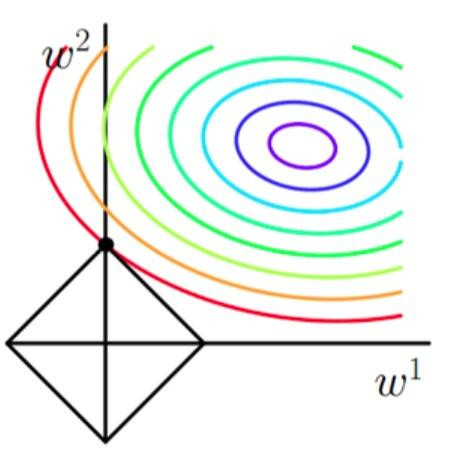

#### L2正则

$$
J(\theta) =\frac{1}{m}\sum^{m}_{i=1} y^{(i)}h_\theta (x^{(i)}) + (1-y^{(i)})(1-h_\theta (x^{(i)})) + \frac{\lambda}{2m}\sum^m_{i=1}\theta_i^2
$$

$$
\Delta_{\theta_i} l(\theta) = \frac{1}{m}\sum^m_{i=1}(y^{(i)} - h_\theta (x^{(i)}))x^{(i)} + \frac{\lambda}{m}\theta_i
$$

梯度下降法的迭代函数变为,

$$\theta:=\theta-K'(\theta)-\frac{2\lambda}{m}\theta$$

$K(\theta)$为原来的损失函数，最有一项的$\lambda$决定了对参数的惩罚力度，惩罚力度越大，最后的结果向量的参数普遍较小且分散，避免了个别参数对整个函数起较大的影响。（见图示，相当于在等高线上找令圆形最小的点）

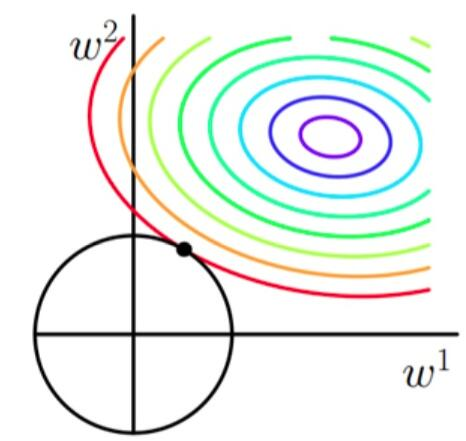

#### 逻辑回归的评价指标

由于逻辑回归模型属于分类模型，不能用线性回归的评价指标。
二元分类的评价指标基本都适用于逻辑回归。
观察以下混淆矩阵，

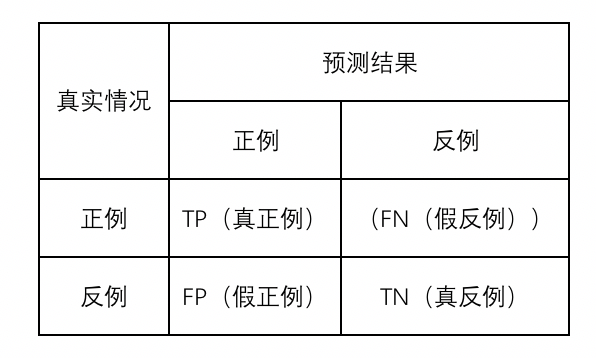

我们可以用查准率和查全率来评价预测结果：
* 查准率 $P =\frac{TP}{TP+FP}$ 
* 查全率 $R =\frac{TP}{TP+FN}$

我们可以用P-R曲线表示查准率和查全率之间的关系：

查准率和查全率经常相互矛盾，一般查准率高时查全率低，查全率高时查准率低。我们经常针对具体的应用场景决定更看重哪一个指标。

<td bgcolor=#87CEEB>小练习：试举例说明，在什么场景下，更看重查准率；在什么情况下，更看重查全率，并说明原因。</td>

<img src = "https://ask.qcloudimg.com/http-save/developer-news/4b1eek0aoz.jpeg?imageView2/2/w/1620"></img>

P-R曲线越靠外，则预测效果越好，如果两条P-R曲线相交，则难说孰优孰率，可以计算曲线包住的面积。

我们可以用$F_\beta$表达对查准率/查全率的不同偏好，定义为：

$$F_\beta = \frac{(1+\beta^2) \cdot P \cdot R}{(\beta^2 \cdot P)+R}$$

$\beta$大于1时，查全率有更大影响；$\beta$小于1时，查准率有更大影响；$\beta$等于0时，即标准的F1度量。

但是，当正负样本分布发生变化时，P-R曲线会受到较大影响。试想负样本的数量扩大10倍，FP和TN都会成倍增加，会影响到查准率和查全率。这时候我们可以用ROC曲线来评价模型。



定义：
* $TPR = \frac{TP}{TP+FN}$
* $FPR = \frac{FP}{TN+FP}$
绘图的过程可以将样本的预测概率排序，将分类阈值从最小向最大移动，则每个阈值会得到一组TPR和FPR的位置点，将所有的点连结，则绘制成ROC曲线，同时，计算曲线下的面积，即AUC值。AUC值越大，则说明预测的效果越好。<br>

<img src = "https://upload-images.jianshu.io/upload_images/11525720-dd2545eaaaa7c2ba.png?imageMogr2/auto-orient/strip|imageView2/2/w/1200/format/webp" width = 500></img>

#### AUC值的计算

计算方法一：

<img src = "http://www.csuldw.com/assets/articleImg/roc_plot.gif"></img>

上图很形象地描述了RUC的描绘过程，那么，计算AUC值也很直观了，每一组点的坐标,可以写成$(x_i,y_i)$，那么，

$$AUC = \frac{1}{2}\sum^{m-1}_{i=1}(x_{i+1}-x_i) \cdot(y_i + y_{i+1})$$

上式乘以二分之一的原因是，阈值变更时，上图正例和反例单个出现的，但当数据量增加，每个阈值同时存在多个正例和反例时，上升的轨迹可能是斜线，因此要计算梯形面积。

计算方法二：

任意给一个正样本和负样本，如果正样本的预测概率大于负样本，意味着以此正样本的预测概率为阈值，预测是成功的，则增加1分；如果两者相等，则增加0.5分。



$$
令 AUC_{ij} = \left\{
\begin{aligned}
    1, & & if & &pos\_score_i > neg\_score_j \\
    0.5, & & if & &pos\_score_i = neg\_score_j \\
    0, & & if & &pos\_score_i < neg\_score_j
\end{aligned}
\right.$$

单个正样本对所有负样本的得分占全部负样本的比例为：$AUC_i = \frac{1}{m^-}\sum
^{m^-}_{j=1}AUC_{ij}$

如果一个正样本在ROC曲线上的坐标为$(x,y)$，x即排序在其之前的负样本所占的比例，即假正例率。那么，整条曲线的ROC值即 

$$
AUC = \frac{1}{m^+m^-}AUC_{ij} = \frac{1}{m^+m^-}\sum_{x^+\in D^+} \sum_{x^- \in D^-}(\mathbb{I}(f(x^+)<f(x^-)) + \frac{1}{2}\mathbb{I}(f(x^+)=f(x^-))
$$

<td bgcolor=#DB7093>方
 法一是将每个预测概率预测正确的比例做积分，方法二是将每个正样本的预测概率大于负样本预测概率的比例做积分。</td>

<td bgcolor=#DB7093>我们可以把方法1理解为，将ROC曲线看作y = f(x)，求定积分$\int_0^1f(x)dx$，方法2理解为，将RUC曲线看作是x = g(y),求$\int_0^1g(y)dy$。</td>

## 5、逻辑回归的优缺点 

* 优点：从上面介绍已经可以额看到，逻辑回归的思想简洁，可以很好的解决二问题。

* 缺点：    
  
观察下图

<img src = "https://img-blog.csdnimg.cn/2019083014370448.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2RwZW5nd2FuZw==,size_16,color_FFFFFF,t_70"></img>

因为预测结果呈Z字型（或反Z字型），因此当数据集中在中间区域时，对概率的变化会很敏感，可能使得预测结果缺乏区分度。 
  
第二，由于逻辑回归依然是线性划分，对于非线性的数据集适应性弱。     
  
第三，当特征空间很大，性能欠佳。 
  
第四，只能处理两分类问题。  
  

## 6、样本不均衡问题

每200封邮件里有1封垃圾邮件，当碰到一封新邮件时，我们只需将其预测为正常邮件，可以达到99.5%的准确率。但是这样的学习器毫无价值，因为他无法判断出任意一封垃圾邮件。

我们预测时，实际上是用预测出的概率值与一个阈值进行比较，例如当y > 0.5时，判断为正例。$\frac{y}{1-y}$表示了正例可能性和反例可能性的比值。阈值为0.5时，即$\frac{y}{1-y}>1$时，预测为正例。

如果令$m_+$为样本正例数，$m_-$为样本负例数，随机的观测几率为$\frac{m_+}{m_-}$。只要分类器的预测概率高于观测几率，应判定为正例，即

$$
\frac{y}{1-y}>\frac{m_+}{m_-}，预测为正例
$$

这时候，需要对预测值进行调整，使得$\frac {y'}{1-y'}=\frac{y}{1-y} \cdot\frac{m_+}{m_-}$，那么，0.5的阈值依然是合理的分类决策。

这就是类别不平衡的一个基本策略——“再缩放”。

“再缩放”的三类做法：
* 欠采样：去除一些反例使得正反例数目接近。
* 过采样：增加一些正例使得正反例数目接近。
* 阈值移动：基于原始集学习，当在预测是，将决策阈值改为符合样本正负样本比例的值。

可以想到，过采样因为增加了数据，时间开销大于欠采样法。但欠采样法由于随机丢弃反例，可能丢失一些重要信息。这时候可以将反例划分成若干个集合分别学习，从全局来看并非丢失重要信息。

## 7、sklearn参数

Logistics Regression参数名称

#### 函数调用形式

LogisticRegression(penalty='l2',dual=False,tol=1e-4,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='liblinear',max_iter=100,multi_class='ovr',verbose=0,warm_start=False, n_jobs=1)

#### penalty

字符串型，’l1’ or ‘l2’，默认：’l2’；正则化类型。

#### dual

布尔型，默认：False。当样本数>特征数时，令dual=False；用于liblinear解决器中L2正则化。

#### tol

浮点型，默认：1e-4；迭代终止判断的误差范围。

#### C

浮点型，默认：1.0；其值等于正则化强度的倒数，为正的浮点数。数值越小表示正则化越强。

#### fit_intercept

布尔型，默认：True；指定是否应该向决策函数添加常量(即偏差或截距)。

#### intercept_scaling

浮点型，默认为1；仅仅当solver是”liblinear”时有用。

#### class_weight

默认为None；与“{class_label: weight}”形式中的类相关联的权重。如果不给，则所有的类的权重都应该是1。

#### random_state

整型，默认None；当“solver”==“sag”或“liblinear”时使用。在变换数据时使用的伪随机数生成器的种子。如果是整数, random_state为随机数生成器使用的种子;若为RandomState实例，则random_state为随机数生成器;如果没有，随机数生成器就是' np.random '使用的RandomState实例。

#### solver

{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}，默认: 'liblinear'；用于优化问题的算法。

对于小数据集来说，“liblinear”是个不错的选择，而“sag”和'saga'对于大型数据集会更快。

对于多类问题，只有'newton-cg'， 'sag'， 'saga'和'lbfgs'可以处理多项损失;“liblinear”仅限于“one-versus-rest”分类。

#### max_iter

最大迭代次数，整型，默认是100；

#### multi_class

字符串型，{ovr'， 'multinomial'}，默认:'ovr'；如果选择的选项是“ovr”，那么一个二进制问题适合于每个标签，否则损失最小化就是整个概率分布的多项式损失。对liblinear solver无效。

#### verbose

整型，默认是0；对于liblinear和lbfgs solver，verbose可以设为任意正数。

#### warm_start

布尔型，默认为False；当设置为True时，重用前一个调用的解决方案以适合初始化。否则，只擦除前一个解决方案。对liblinear解码器无效。

#### n_jobs

整型，默认是1；如果multi_class='ovr' ，则为在类上并行时使用的CPU核数。无论是否指定了multi_class，当将' solver ' '设置为'liblinear'时，将忽略此参数。如果给定值为-1，则使用所有核。

原文链接：https://blog.csdn.net/qq_38683692/article/details/82533460

## 8、代码实现

#### 1、先尝试调用sklearn的线性回归模型训练数据，尝试以下代码，画图查看分类的结果

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +',header=None, engine='python') #读取X值
ys = pd.read_csv('./logistic_y.txt', sep='\ +',header=None, engine='python') #读取y值
ys = ys.astype(int)
df_X['label'] = ys[0].values #将X按照y值的结果一一打标签


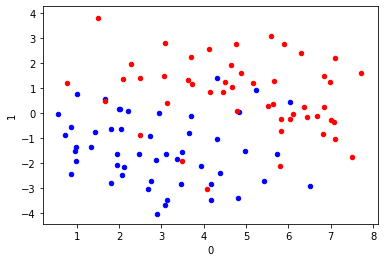

In [4]:
ax = plt.axes()
#在二维图中描绘X点所处位置，直观查看数据点的分布情况
df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
#提取用于学习的数据
Xs = df_X[[0, 1]].values
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs]) 
ys = df_X['label'].values

In [6]:
from __future__ import print_function
import numpy as np
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False) #因为前面已经将截距项的值合并到变量中，此处参数设置不需要截距项
lr.fit(Xs, ys) #拟合
score = lr.score(Xs, ys) #结果评价
print("Coefficient: %s" % lr.coef_)
print("Score: %s" % score)


Coefficient: [[-1.70090714  0.55446484  1.07222372]]
Score: 0.898989898989899


/home/xiaoran/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


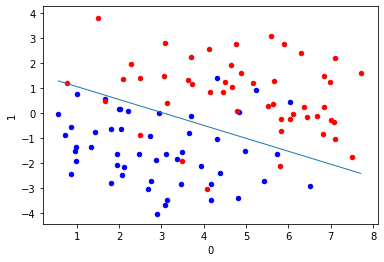

In [7]:
ax = plt.axes()

df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])

#将数据以二维图形式描点，并用学习得出的参数结果作为阈值，划分数据区域
_ys = (lr.coef_[0][0] + lr.coef_[0][1] * _xs) / (- lr.coef_[0][2])
plt.plot(_xs, _ys, lw=1)

#### 2 用梯度下降法将相同的数据分类，画图和sklearn的结果相比较

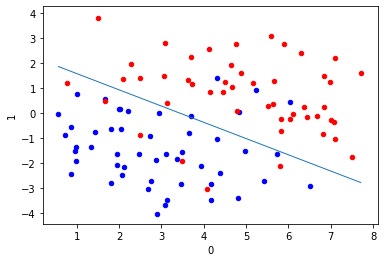

In [17]:
class LGR_GD():
    def __init__(self):
        self.w = None 
        self.n_iters = None
    def fit(self,X,y,alpha=0.03,loss = 1e-10): # 设定步长为0.002，判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        self.n_iters = 0
        #============================= show me your code =======================
        while tol > loss: #设置收敛条件
            
            self.n_iters += 1 #更新迭代次数
         #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LGR_GD()
    lr_gd.fit(Xs,ys)

    ax = plt.axes()

    df_X.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
    df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

    _xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
    _ys = (lr_gd.w[0][0] + lr_gd.w[0][1] * _xs) / (- lr_gd.w[0][2])
    plt.plot(_xs, _ys, lw=1)

#### 3 用牛顿法实现结果，画图和sklearn的结果相比较，并比较牛顿法和梯度下降法迭代收敛的次数

In [15]:
class LGR_NT():
    def __init__(self):
        self.w = None
        self.n_iters = None
    def fit(self,X,y,loss = 1e-10): # 判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((1,d)) #将参数的初始值定为0
        tol = 1e5
        n_iters =0
        Hessian = np.zeros((d,d))
        #============================= show me your code =======================
        while tol > loss:
            
            n_iters += 1
        #============================= show me your code =======================
        self.w = theta
        self.n_iters = n_iters
        
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lgr_nt = LGR_NT()
    lgr_nt.fit(Xs,ys)

#### 比较梯度下降法和牛顿法收敛速度

In [16]:
print("梯度下降法结果参数：%s;梯度下降法迭代次数：%s" %(lgr_gd.w,lgr_gd.n_iters))
print("牛顿法结果参数：%s;牛顿法迭代次数：%s" %(lgr_nt.w,lgr_nt.n_iters))

梯度下降法结果参数：[[-2.62051144  0.7603715   1.17194673]];梯度下降法迭代次数：32590
牛顿法结果参数：[[-2.6205116   0.76037154  1.17194674]];牛顿法迭代次数：47


可以，看到，牛顿法的收敛速度比梯度下降法快很多。

## 参考：

吴恩达 CS229课程

周志华 《机器学习》

https://blog.csdn.net/dpengwang/article/details/100159369

https://blog.csdn.net/u014106644/article/details/83660226

https://blog.csdn.net/abcjennifer/article/details/7716281

https://blog.csdn.net/portfloat/article/details/79200695


https://cloud.tencent.com/developer/news/319664

https://www.jianshu.com/p/2ca96fce7e81

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://blog.csdn.net/yoggieCDA/article/details/88953206

https://blog.csdn.net/ustbclearwang/article/details/81235892

https://blog.csdn.net/qq_38683692/article/details/82533460

http://www.csuldw.com/2016/03/12/2016-03-12-performance-evaluation/
    

https://blog.csdn.net/u012162613/article/details/44261657

https://blog.csdn.net/qq_32742009/article/details/81839071